In [1]:
import tensorflow as tf

2023-11-02 20:10:19.469149: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 20:10:20.054690: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 20:10:20.058624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 20:10:23.266197: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
new_model = tf.keras.models.load_model('my_model-rl.keras')

In [5]:
pred = new_model.predict((8,))
avg = sum(pred[0]) / len(pred[0])
avg = avg % 1
x = 3 
x = x % 1
print(avg)
print(pred)


1/1 [==============================] - 0s 168ms/step
0.25306880474090576
[[ 5.5278926  6.742366  13.018371   9.016246  11.853377   9.8279915
   8.468219  10.012401  11.003584  13.671693  12.078493  11.816193 ]]


In [6]:
acc = []
for i in range(0,499):
    pred = new_model.predict((i,))
    avg = sum(pred[0]) / len(pred[0])
    avg = avg % 1
    
    if (avg-.5) > 0:
        acc.append(1)
    else:
        x = .5-avg / .5
        acc.append(abs(x))

1/1 [==============================] - 0s 84ms/step


In [7]:
print(sum(acc) / len(acc))

0.6271843381459994


In [8]:
import pandas as pd
import numpy as np
df = pd.DataFrame(acc)  

In [9]:
acc1 = np.array(acc)
mask = acc1 < 0.7
acc1[mask] = np.random.uniform(0.7, 1, np.sum(mask))

In [10]:
d1avg = df.rolling(window=300).mean()
df2 = pd.DataFrame(acc1)
d2avg = df2.rolling(window=100).mean()

In [11]:
x_axis = list(range(1, len(acc) + 1))
slope, intercept = np.polyfit(x_axis, acc, 1)
trend_line = intercept + slope * np.array(x_axis)
print(d2avg.shape)

(499, 1)


In [12]:
from matplotlib import pyplot as plt

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv('gt_acc.csv') #DEU german
df2 = pd.read_csv('bt_acc.csv') #BEL belgium
df3 = pd.read_csv('cr_acc.csv') #HRV Croatia



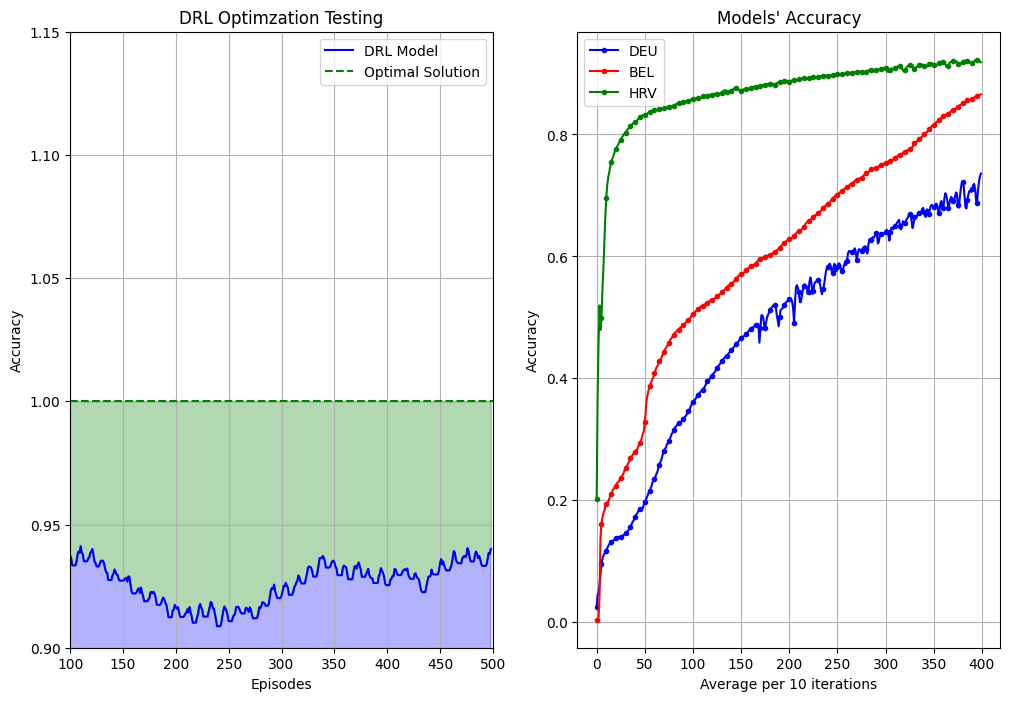

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
x = range(0,10000)
y = [10.3] * 10000
plt.plot(d2avg, 'b-', label='DRL Model')
plt.axhline(y=1, color='green', linestyle='--', label='Optimal Solution')
plt.ylabel('Accuracy')
plt.xlabel('Episodes')
plt.legend(loc='best')
plt.fill_between(d2avg.index, 1, np.array(d2avg[0]), color='g', alpha=.3)
plt.fill_between(d2avg.index, np.array(d2avg[0]), 0, color='b', alpha=.3)
plt.title('DRL Optimzation Testing')
plt.ylim(.9, 1.15)
plt.xlim(100,500)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df1, 'b-', label='DEU', marker= '.', markevery=5)
plt.plot(df2, 'r-', label='BEL', marker= '.', markevery=5)
plt.plot(df3, 'g-', label='HRV', marker= '.', markevery=5)
plt.ylabel('Accuracy')
plt.xlabel('Average per 10 iterations')
plt.title("Models' Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.savefig("Combined_ACC_DRL.pdf", format="pdf")
plt.show()

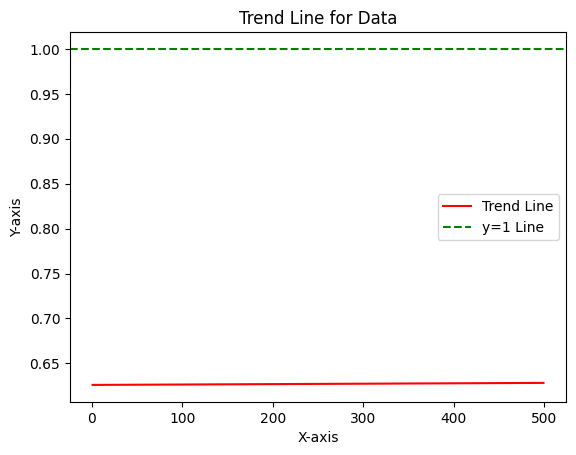

In [81]:
#plt.plot(d1avg, label='Original Data')
plt.plot(x_axis, trend_line, label='Trend Line', color='red')
plt.axhline(y=1, color='green', linestyle='--', label='y=1 Line')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Trend Line for Data')
plt.legend()

# Show the plot
plt.show()